I am going to clean the data as the data we scraped from Flipkart isn't ready to work with. <br>
List of things we need to take care of
- remove '₹' and ',' from the `price` column
- turn the `price` column into numeric datatype
- split `review` column that has data of both number of ratings and number of reviews into two columns

In [29]:
# importing libraries
import pandas as pd

In [30]:
# reading file
df = pd.read_csv('ev_scraped_data.csv')
df.head()

,company,name,price,rating,review
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,"₹1,04,900",4.2,215 Ratings & 39 Reviews
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,"₹1,46,355",4.2,215 Ratings & 39 Reviews
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,"₹1,46,355",4.2,215 Ratings & 39 Reviews
3,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,"₹1,00,900",4.2,215 Ratings & 39 Reviews
4,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,"₹1,00,900",4.2,215 Ratings & 39 Reviews


In [31]:
df.tail(10)

,company,name,price,rating,review
50,Okaya,OKAYA ClassIQ Booking for Ex-Showroom Price (w...,"₹74,499",3.6,21 Ratings & 5 Reviews
51,Okaya,OKAYA Faast F2B Booking for Ex-Showroom Price ...,"₹99,950",4.1,37 Ratings & 12 Reviews
52,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.4,528 Ratings & 84 Reviews
53,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.4,528 Ratings & 84 Reviews
54,Vida,VIDA Powered by Hero V1 Plus Booking for Ex-Sh...,"₹1,45,000",4.0,16 Ratings & 1 Reviews
55,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.4,528 Ratings & 84 Reviews
56,Vida,VIDA Powered by Hero V1 Plus Booking for Ex-Sh...,"₹1,45,000",4.0,16 Ratings & 1 Reviews
57,Vida,VIDA Powered by Hero V1 Plus Booking for Ex-Sh...,"₹1,45,000",4.0,16 Ratings & 1 Reviews
58,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.4,528 Ratings & 84 Reviews
59,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.4,528 Ratings & 84 Reviews


Price data have comma separators and rupees symbol that won't allow us to turn it into numeric type so we need to tackle them first

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  60 non-null     object 
 1   name     60 non-null     object 
 2   price    60 non-null     object 
 3   rating   60 non-null     float64
 4   review   60 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


We can see that `price` column is object data type and we want it to be int/float to make it useful for analysis

In [33]:
# replacing '₹' (inr symbol) with '' (nothing) and replacing ',' (comma) with '' (nothing)
df['price'] = df['price'].str.replace('₹','').str.replace(',','')

In [34]:
df.price.head()

0    104900
1    146355
2    146355
3    100900
4    100900
Name: price, dtype: object

We have tackled the first issue, moving on to the next

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  60 non-null     object 
 1   name     60 non-null     object 
 2   price    60 non-null     object 
 3   rating   60 non-null     float64
 4   review   60 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


In [36]:
# converting price into numeric datatype
df.price = pd.to_numeric(df.price)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  60 non-null     object 
 1   name     60 non-null     object 
 2   price    60 non-null     int64  
 3   rating   60 non-null     float64
 4   review   60 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


Here we have tackled the 2nd problem as well

Now moving on to the 3rd change I would like to make is, make two individual columns for:
- rating count
- review count

as it would give us more room to analyse in future

In [38]:
df[['rating_count','review_count']] = df.review.str.split('&', expand = True)

In [39]:
df.head(3)

,company,name,price,rating,review,rating_count,review_count
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,104900,4.2,215 Ratings & 39 Reviews,215 Ratings,39 Reviews
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215 Ratings & 39 Reviews,215 Ratings,39 Reviews
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215 Ratings & 39 Reviews,215 Ratings,39 Reviews


now that we have those into two separate columns i.e `rating_count` and `review_count`, we can drop the original column i.e `review`

In [40]:
df = df.drop('review',axis = 1)

In [41]:
df.head(3)

,company,name,price,rating,rating_count,review_count
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,104900,4.2,215 Ratings,39 Reviews
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215 Ratings,39 Reviews
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215 Ratings,39 Reviews


The column `review` has been dropped

So, since the new columns are called `rating_count` and `review_count`, they would make more sense if they were a numerical datatype
For that
- We need to remove the string part of the records
- Convert their datatypes to numeric

In [42]:
# removing the word 'Ratings' from the records
df.rating_count = df.rating_count.str.replace('Ratings', '')
df.head(3)

,company,name,price,rating,rating_count,review_count
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,104900,4.2,215,39 Reviews
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39 Reviews
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39 Reviews


In [43]:
# removing the word 'Reviews' from the records
df.review_count = df.review_count.str.replace("Reviews", '')
df.head(3)

,company,name,price,rating,rating_count,review_count
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,104900,4.2,215,39
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39


That takes care of the string within the record, we heading towards changing it's datatype

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       60 non-null     object 
 1   name          60 non-null     object 
 2   price         60 non-null     int64  
 3   rating        60 non-null     float64
 4   rating_count  60 non-null     object 
 5   review_count  60 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.9+ KB


In [45]:
df.rating_count = df.rating_count.str.strip()

In [46]:
df.rating_count = pd.to_numeric(df.rating_count)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       60 non-null     object 
 1   name          60 non-null     object 
 2   price         60 non-null     int64  
 3   rating        60 non-null     float64
 4   rating_count  60 non-null     int64  
 5   review_count  60 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ KB


In [48]:
pd.to_numeric(df.review_count)

ValueError: Unable to parse string " 39 " at position 0

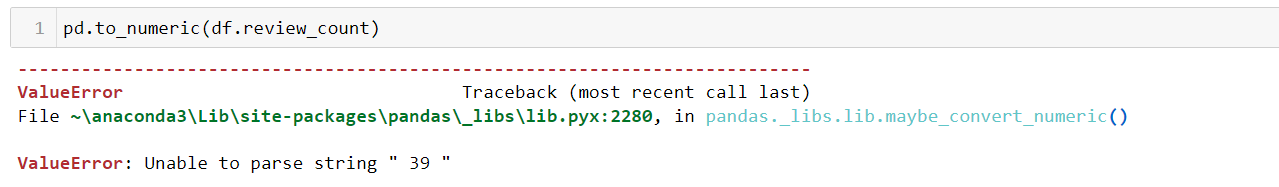

The above is an image of the error that I encountered while changing the datatype of the `review_count` column <br>
and as you can see in the error message, it shows white spaces before and after the number. <br>
hence using the `strip()` function should help

In [49]:
df.review_count = df.review_count.str.strip()

In [50]:
df.review_count = pd.to_numeric(df.review_count)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       60 non-null     object 
 1   name          60 non-null     object 
 2   price         60 non-null     int64  
 3   rating        60 non-null     float64
 4   rating_count  60 non-null     int64  
 5   review_count  60 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.9+ KB


I have made both `rating_count` and `review_count` into numeric datatype

Finally, Done with all the data cleaning and transformations we needed to make <br>
Now I will export the cleaned dataset into a CSV file

In [52]:
df.to_csv('ev_cleaned_data', ',', index = False, encoding= 'UTF-8')

In [53]:
# reading the file to make sure everything exported properly
pd.read_csv('ev_cleaned_data').sample(10)

,company,name,price,rating,rating_count,review_count
51,Okaya,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.1,37,12
45,Okaya,OKAYA Faast F2F Booking for Ex-Showroom Price ...,93999,4.0,4,0
42,Okaya,OKAYA Faast F2F Booking for Ex-Showroom Price ...,93999,4.0,4,0
58,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.4,528,84
55,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.4,528,84
32,Okaya,OKAYA FAAST F4 Booking for Ex-Showroom Price (...,132990,4.3,48,5
24,Bounce Infinity,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,96,31
18,Bgauss,BGauss BG C12i Ex Booking for Ex-Showroom Pric...,105000,3.9,12,5
22,Bgauss,BGauss BG D15i Booking for Ex-Showroom Price (...,134514,4.4,25,6
28,Okaya,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.1,37,12


<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyed-asif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>